<a href="https://colab.research.google.com/github/ponjose004/Gene_cluster_analysis/blob/main/Gene_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/yeast gene cluster/SC_expression.csv')
df.head()

,Unnamed: 0,IFFABF,SAASCC,IFFAFF,IFFAFA,INICIA,INICIF,SAABQI,FFNAAA,IFAAAR,...,SAABIQ,AFNAQI,SAANNN,IFFABB,FFNARS,SAABQF,IFFAFS,IFAAAA.1,IFFAFI,SARIAI
0,YAL008W,70.804931,30.970186,118.384653,110.703950,74.102235,89.802220,7.341536,112.091167,5.973668,...,12.953973,1.638143,34.066051,81.346495,127.981129,14.649997,101.586667,6.574096,110.284505,1.489269
1,YBR255W,36.368786,16.860290,27.726452,34.527928,35.440199,56.971301,15.452185,26.858749,5.384088,...,21.543401,3.547613,28.997105,35.137835,31.181031,13.574768,30.903387,6.459673,29.086023,5.119361
2,YGR164W,0.351389,0.904239,0.456027,0.292610,0.000000,1.103560,0.769113,18.085545,0.711946,...,1.222073,0.712236,0.904559,0.000000,2.586445,1.209633,0.082190,0.977793,0.100993,0.046540
3,YGR131W,7.379174,5.858715,12.130323,12.679748,11.276427,18.484635,2.377259,22.251591,4.405163,...,2.199731,0.491782,11.025385,7.059656,21.936885,2.016055,9.369644,4.691325,12.018183,0.930793
4,YNL003C,82.049386,78.480411,67.218405,64.179030,75.713153,75.317991,20.136785,43.326887,30.324430,...,21.124404,4.232717,131.212325,84.715876,41.766297,17.539675,66.162837,26.712465,75.239886,3.909330


# **Data Exploration and Visualization**

In [ ]:
# are there missing values? No.
df.isna().sum().sum()

0

In [ ]:
df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070
count,93,93,93.0,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
unique,93,93,91.0,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
top,YAL008W,YBR255W,0.0,YGR131W,YNL003C,YBR135W,YBR160W,YJL082W,YJL142C,YPL191C,...,YNL185C,YCR067C,YGR269W,YMR147W,YCR089W,YPR117W,YHR086W,YBR015C,YPL013C,YHR083W
freq,1,1,3.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# we remove the first column, it's uneeded
df = df.iloc[:,1:]

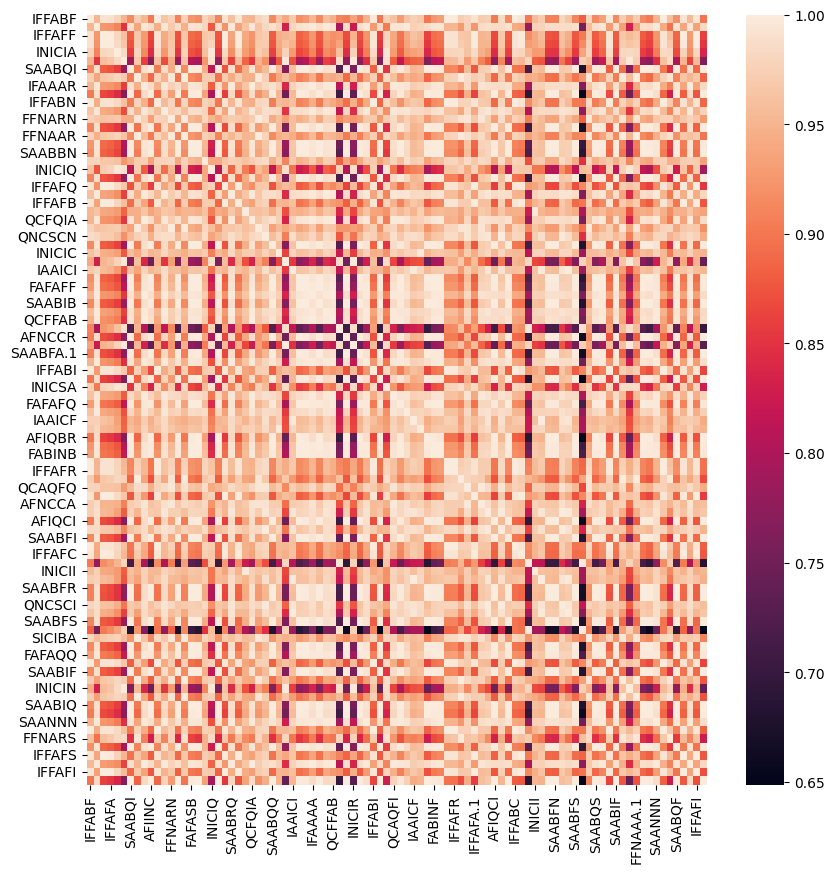

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,10));
sns.heatmap(df.corr());

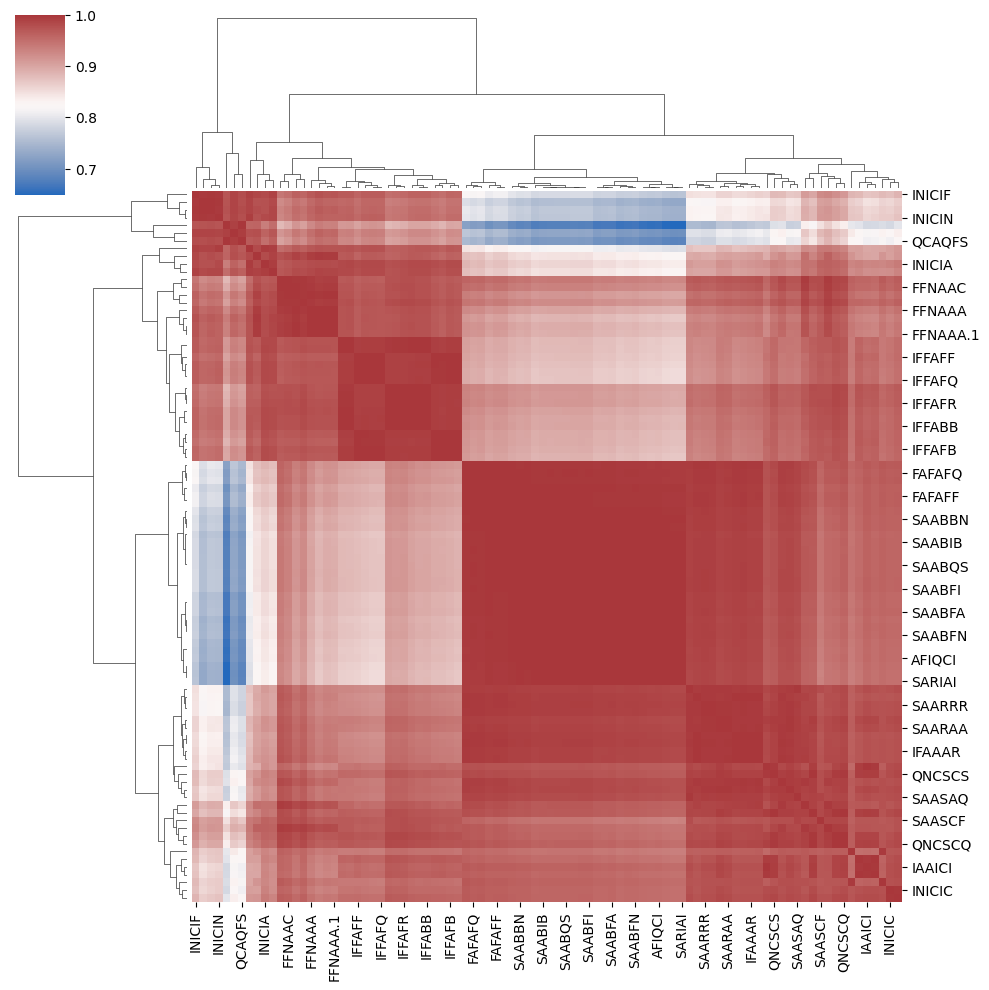

In [ ]:
#clustermap
sns.clustermap(df.corr(),cmap='vlag');

**PCA**

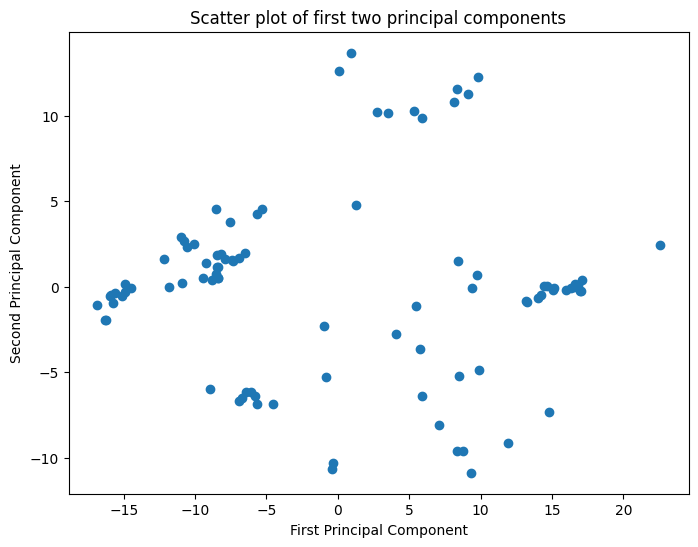

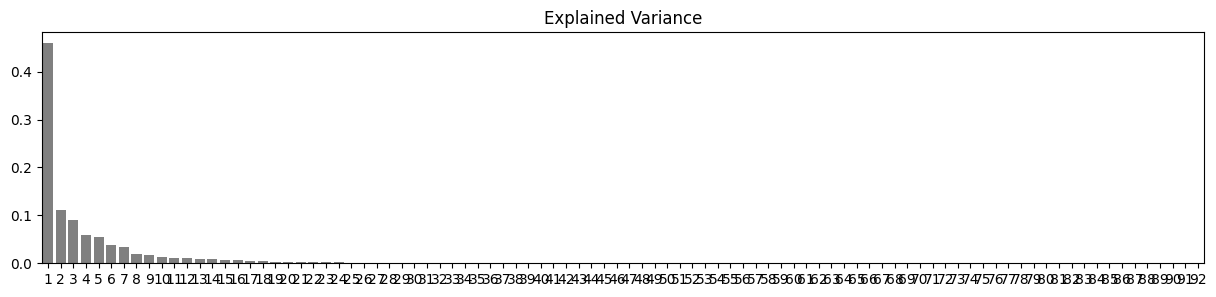

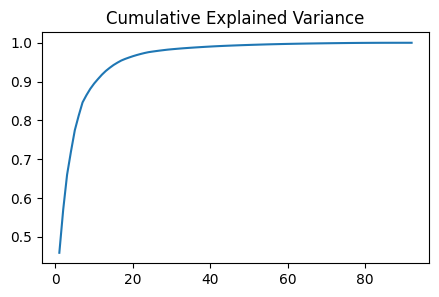

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled = sc.fit_transform(df.T.values)

pca = PCA()
decomp = pca.fit_transform(scaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(decomp[:, 0], decomp[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot of first two principal components')
plt.show()

# Explained variance
plt.figure(figsize=(15, 3))
sns.barplot(x=np.arange(pca.explained_variance_ratio_.shape[0]) + 1,
            y=pca.explained_variance_ratio_, color='Grey')
plt.title('Explained Variance')
plt.show()

# Cumulative explained variance
plt.figure(figsize=(5, 3))
sns.lineplot(x=np.arange(pca.explained_variance_ratio_.shape[0]) + 1,
             y=pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance')
plt.show()


**Other Dimensionality Reduction Visualizations**

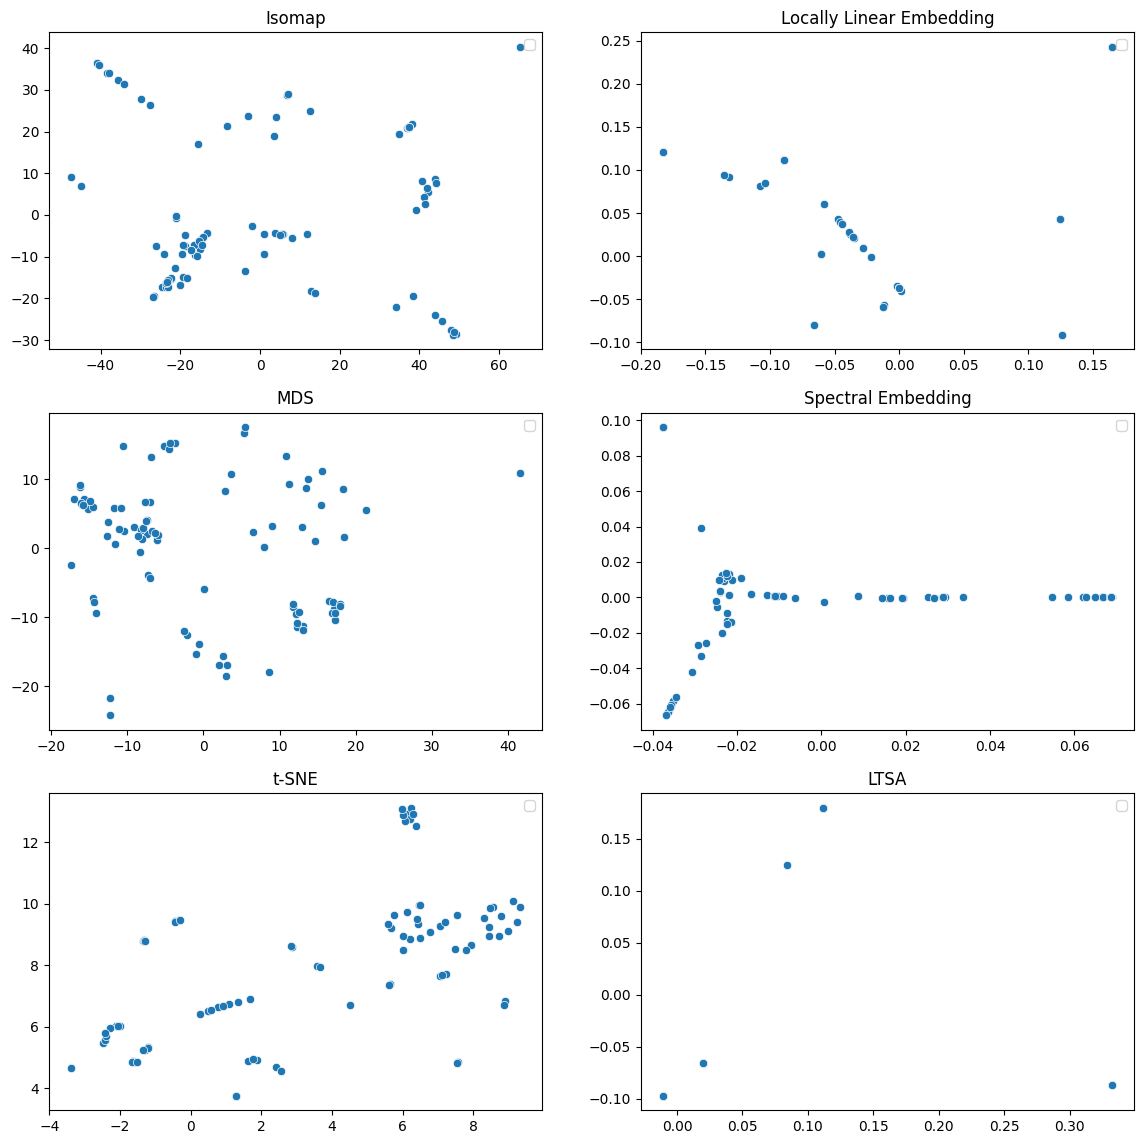

In [ ]:
from sklearn.manifold import Isomap,LocallyLinearEmbedding,MDS,SpectralEmbedding,TSNE

iso = Isomap().fit_transform(scaled)
lle = LocallyLinearEmbedding().fit_transform(scaled)
mds = MDS().fit_transform(scaled)
se = SpectralEmbedding().fit_transform(scaled)
tsne = TSNE().fit_transform(scaled)
ltsa = LocallyLinearEmbedding(method='ltsa').fit_transform(scaled)


plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1]);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1]);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1]);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1]);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1]);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1]);
plt.legend(loc='best');
plt.title('LTSA');

# **Clustering**

**Agglomerative**

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as agglo
from sklearn.metrics import silhouette_samples
from matplotlib import cm

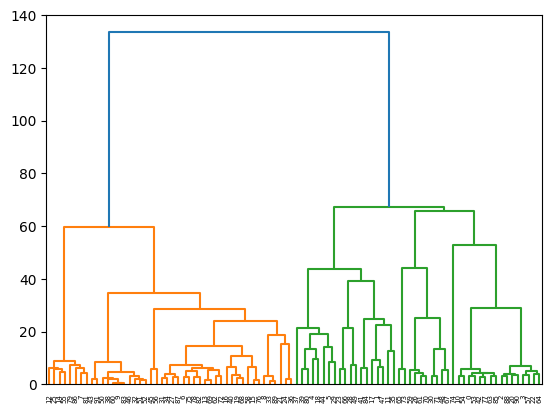

In [ ]:
dend=dendrogram(linkage(scaled, method='ward'))
plt.show();

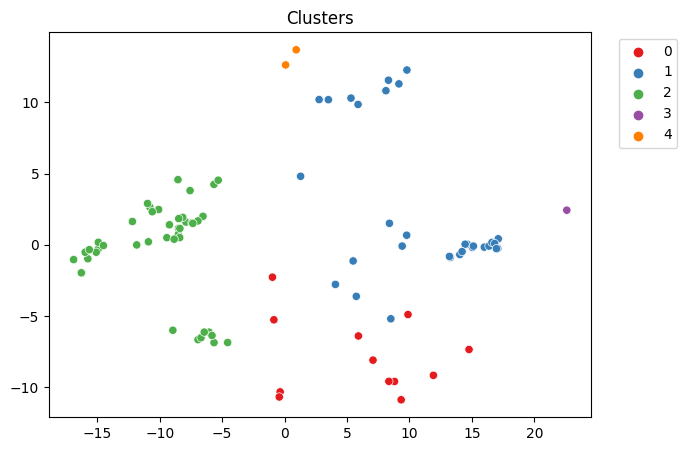

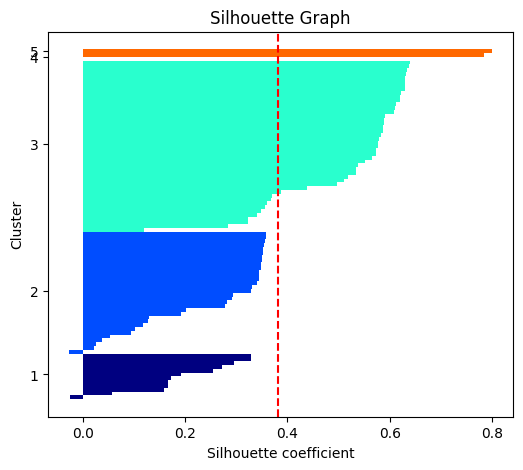

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

ag = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clusters = ag.fit_predict(scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=decomp[:, 0], y=decomp[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters')
plt.legend(loc=(1.05, 0.7))

# Graphing Silhouette
labels = np.unique(clusters)
n_clusters = labels.shape[0]
sils = silhouette_samples(scaled, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(6, 5))
for i, c in enumerate(labels):
    cluster_sil = sils[clusters == c]
    cluster_sil.sort()
    y_ax_upper += len(cluster_sil)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_sil, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_sil)
silhouette_avg = np.mean(sils)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Graph')
plt.show()


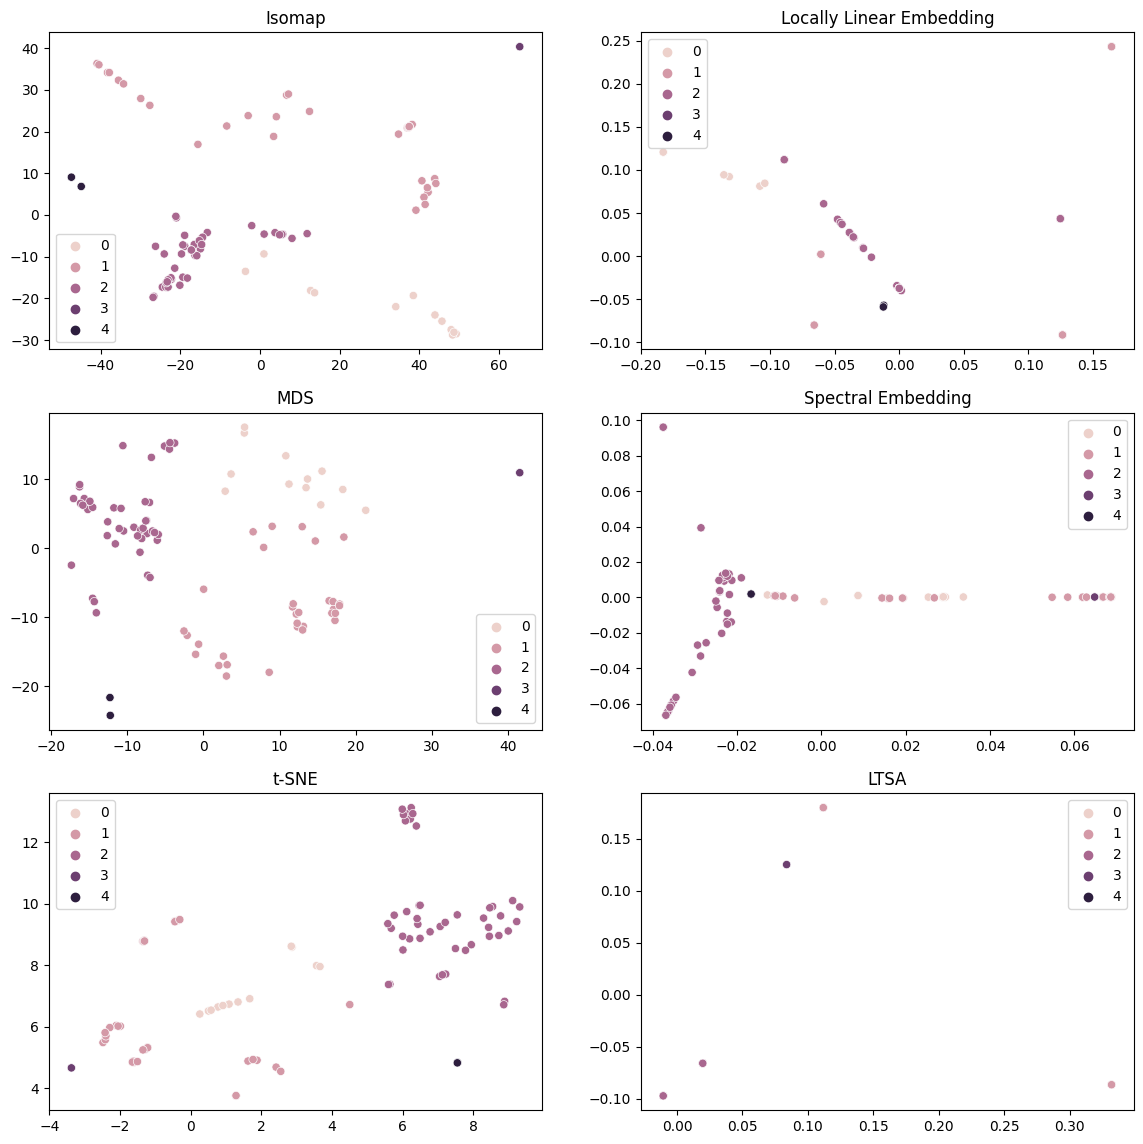

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');

# **K-means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

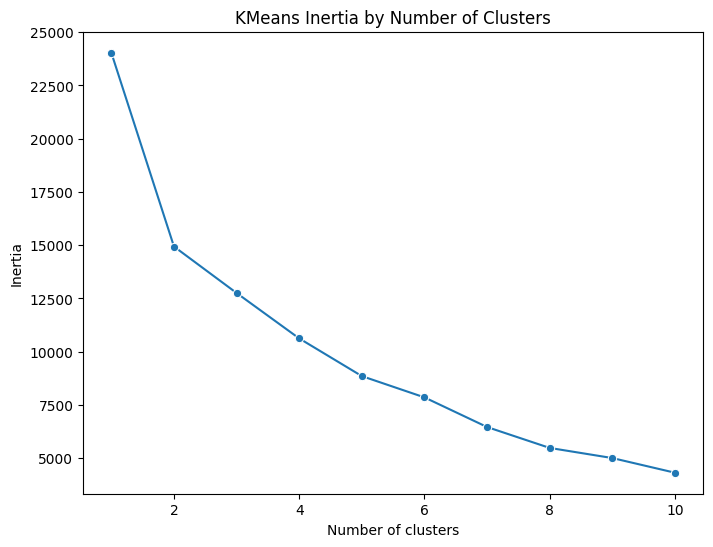

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=33)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('KMeans Inertia by Number of Clusters')
plt.show()


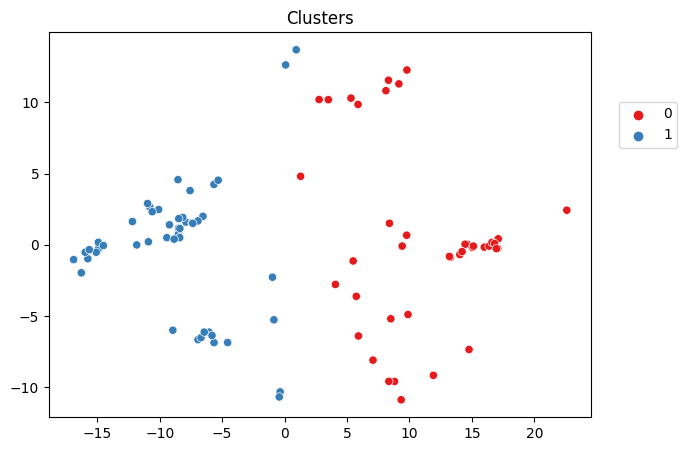

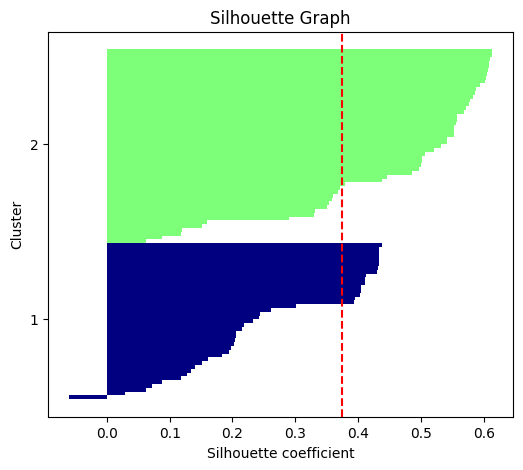

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

km = KMeans(n_clusters=2, random_state=33)
clusters = km.fit_predict(scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=decomp[:, 0], y=decomp[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters')
plt.legend(loc=(1.05, 0.7))

# Graphing Silhouette
labels = np.unique(clusters)
n_clusters = labels.shape[0]
sils = silhouette_samples(scaled, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(6, 5))
for i, c in enumerate(labels):
    cluster_sil = sils[clusters == c]
    cluster_sil.sort()
    y_ax_upper += len(cluster_sil)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_sil, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_sil)
silhouette_avg = np.mean(sils)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Graph')
plt.yticks(yticks, labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


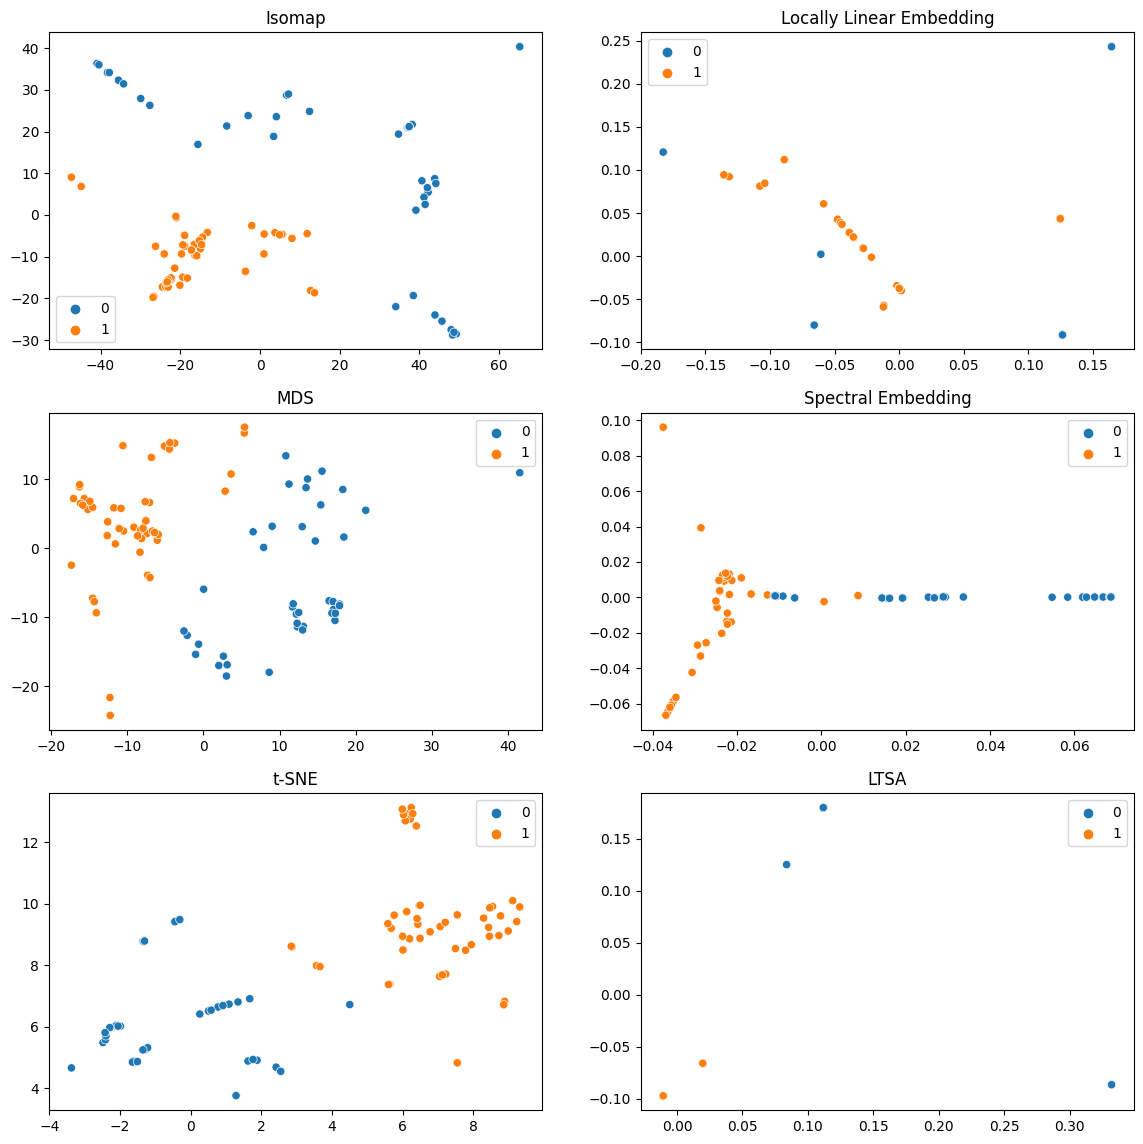

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');

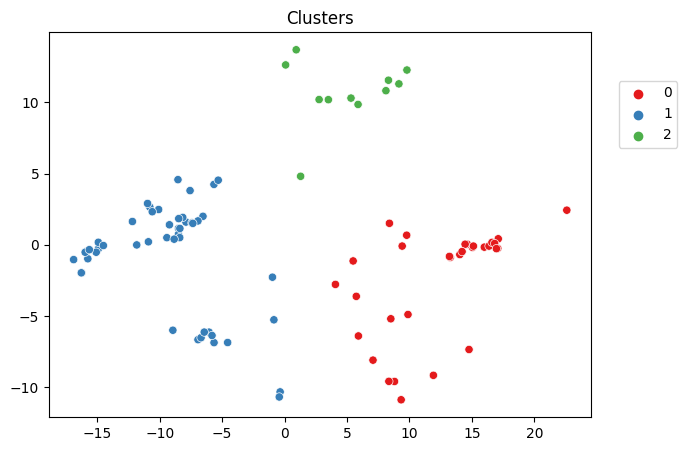

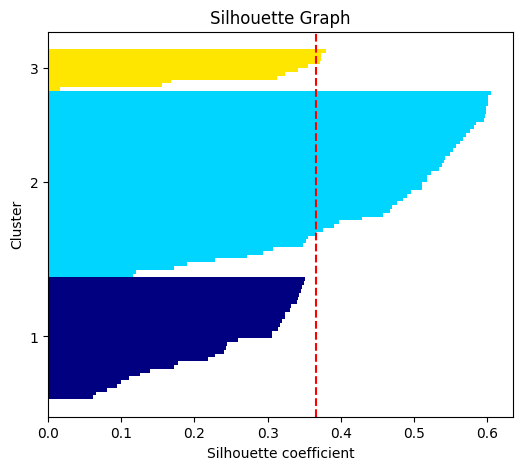

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

km = KMeans(n_clusters=3, random_state=33)
clusters = km.fit_predict(scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=decomp[:, 0], y=decomp[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters')
plt.legend(loc=(1.05, 0.7))

# Graphing Silhouette
labels = np.unique(clusters)
n_clusters = labels.shape[0]
sils = silhouette_samples(scaled, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(6, 5))
for i, c in enumerate(labels):
    cluster_sil = sils[clusters == c]
    cluster_sil.sort()
    y_ax_upper += len(cluster_sil)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_sil, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_sil)
silhouette_avg = np.mean(sils)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Graph')
plt.yticks(yticks, labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


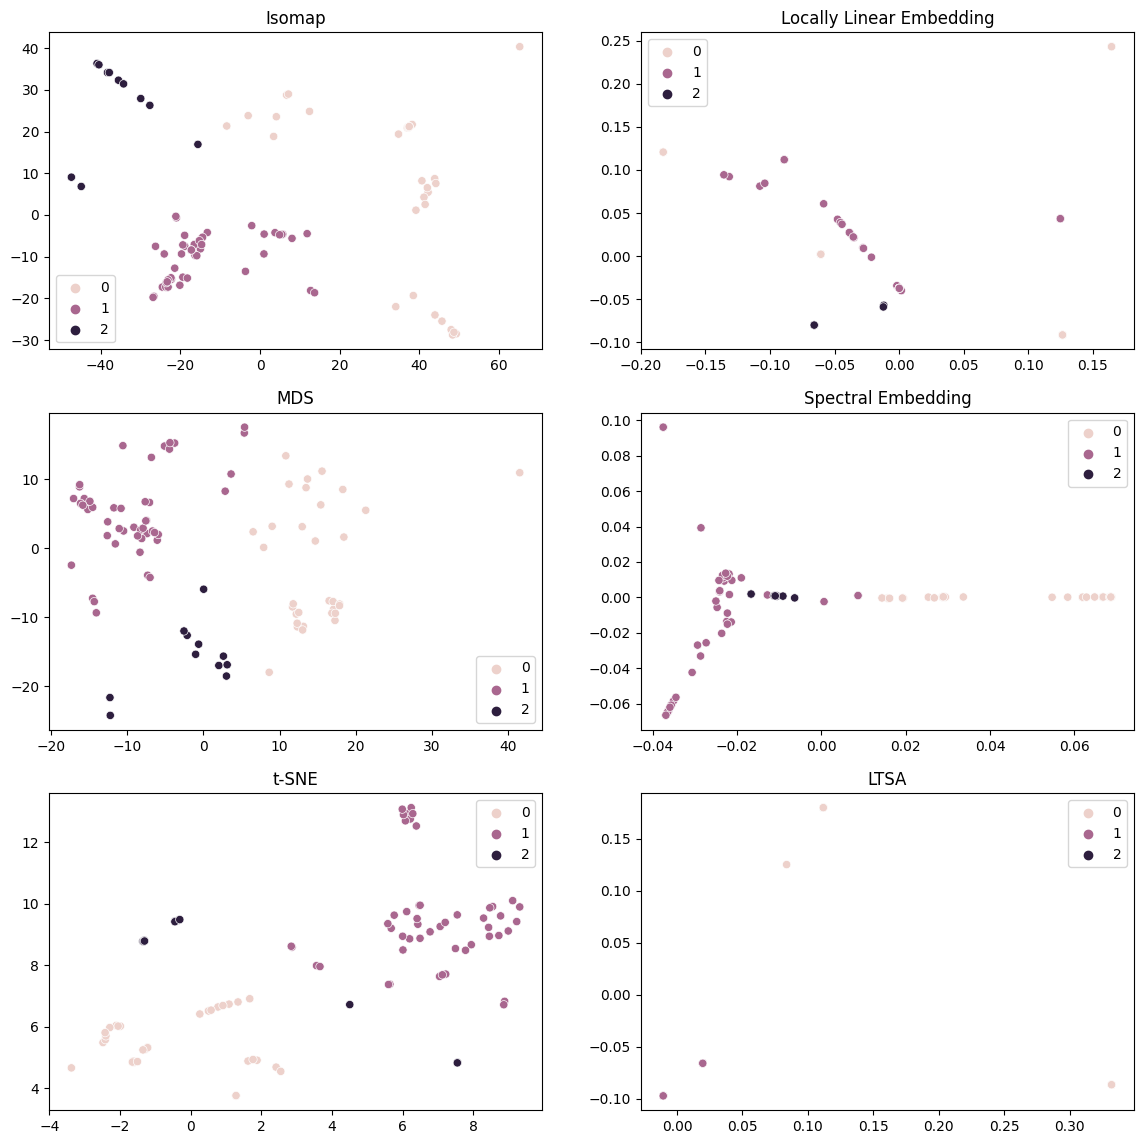

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');

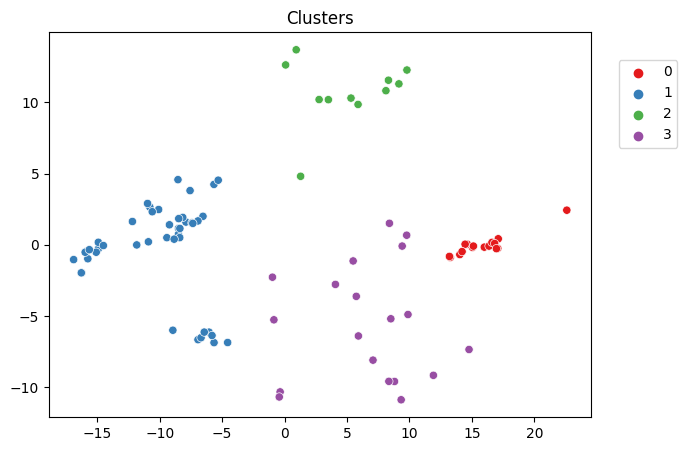

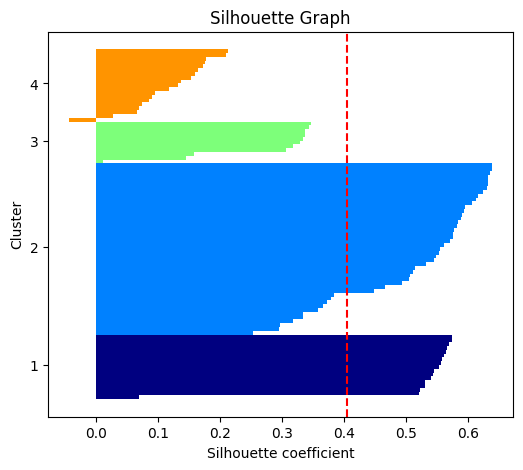

In [ ]:
km = KMeans(n_clusters=4, random_state=33)
clusters = km.fit_predict(scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=decomp[:, 0], y=decomp[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters')
plt.legend(loc=(1.05, 0.7))

# Graphing Silhouette
labels = np.unique(clusters)
n_clusters = labels.shape[0]
sils = silhouette_samples(scaled, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(6, 5))
for i, c in enumerate(labels):
    cluster_sil = sils[clusters == c]
    cluster_sil.sort()
    y_ax_upper += len(cluster_sil)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_sil, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_sil)
silhouette_avg = np.mean(sils)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Graph')
plt.yticks(yticks, labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

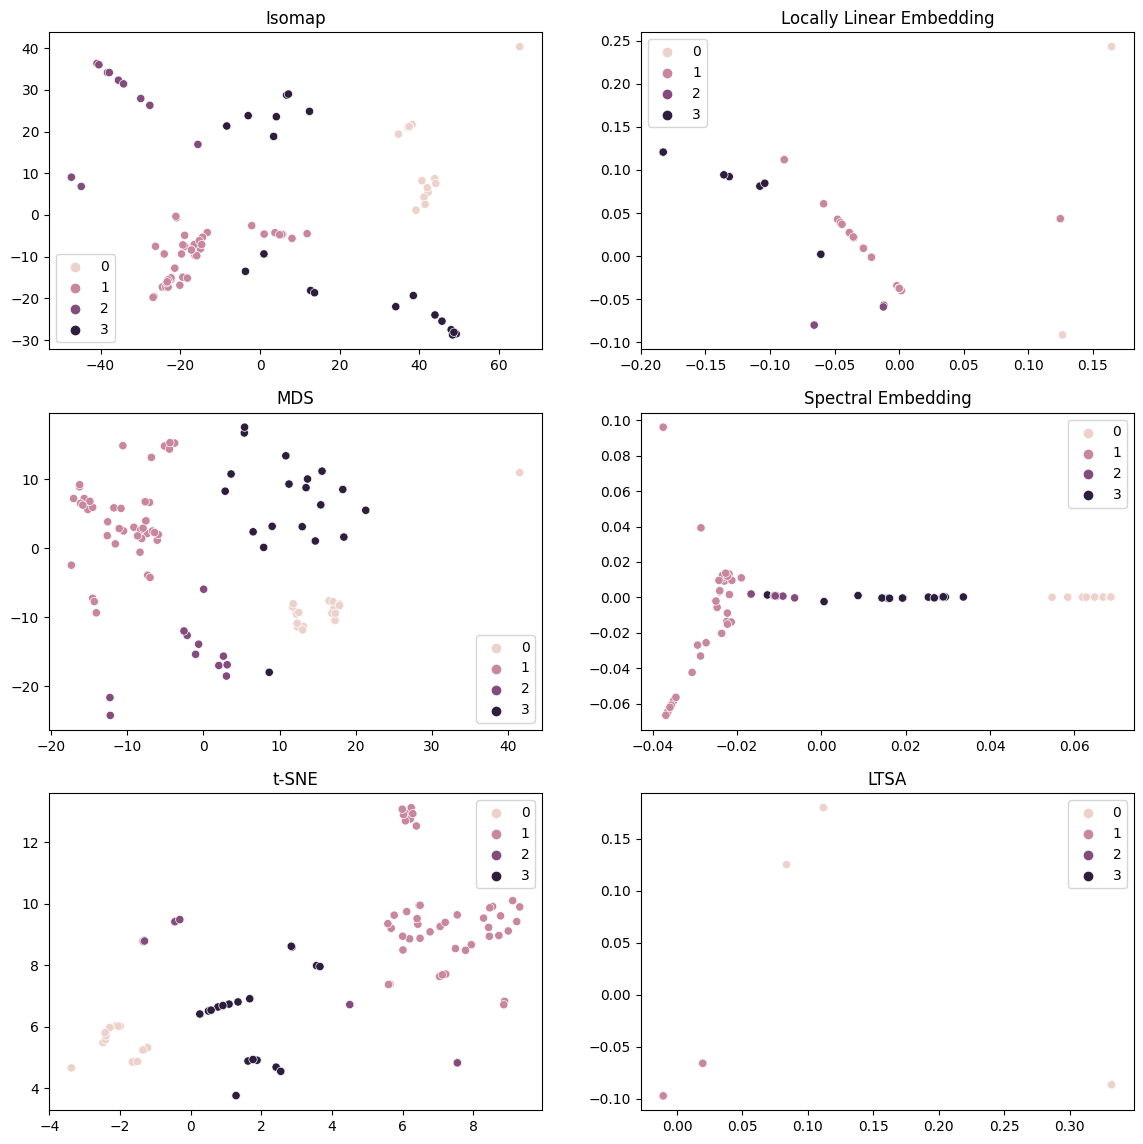

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');

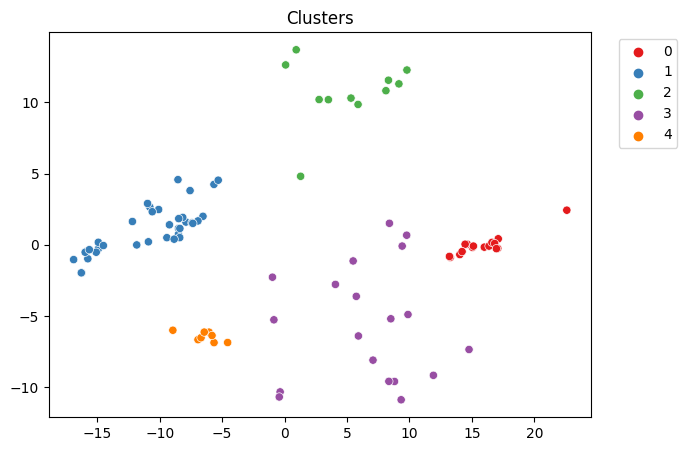

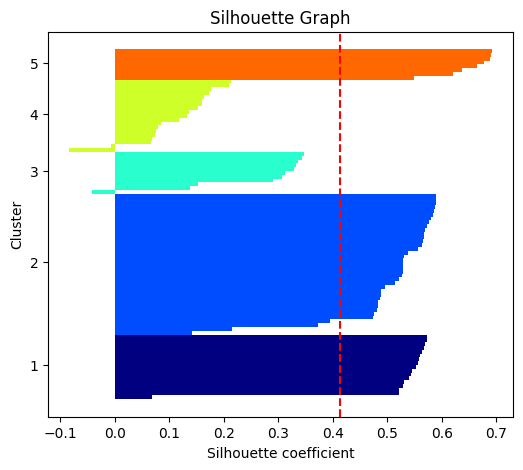

In [ ]:
km = KMeans(n_clusters=5, random_state=33)
clusters = km.fit_predict(scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=decomp[:, 0], y=decomp[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters')
plt.legend(loc=(1.05, 0.7))

# Graphing Silhouette
labels = np.unique(clusters)
n_clusters = labels.shape[0]
sils = silhouette_samples(scaled, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(6, 5))
for i, c in enumerate(labels):
    cluster_sil = sils[clusters == c]
    cluster_sil.sort()
    y_ax_upper += len(cluster_sil)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             cluster_sil, height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_sil)
silhouette_avg = np.mean(sils)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Graph')
plt.yticks(yticks, labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

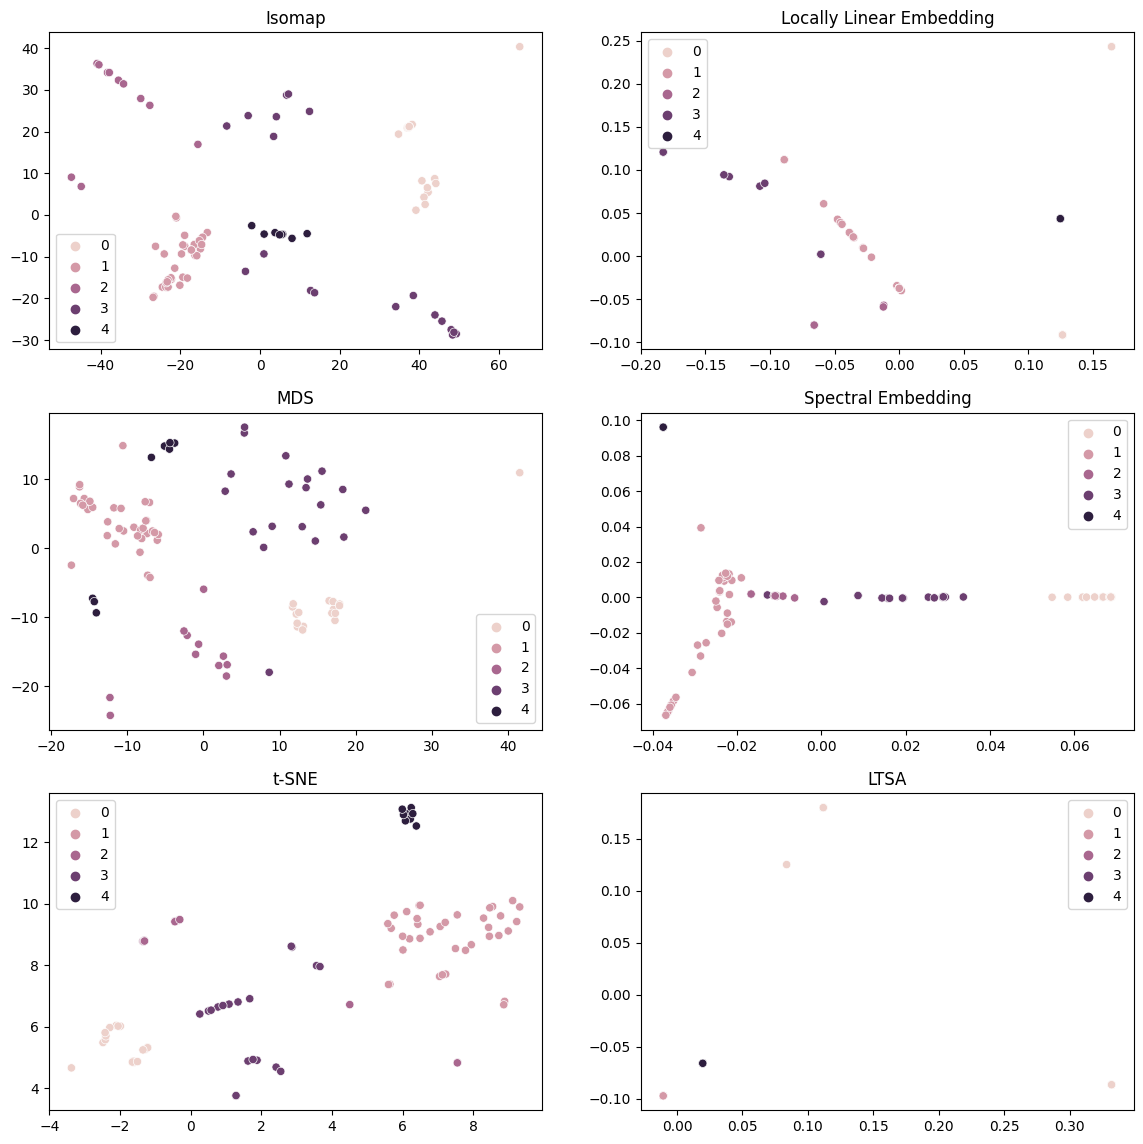

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');


# **Spectral Clustering**

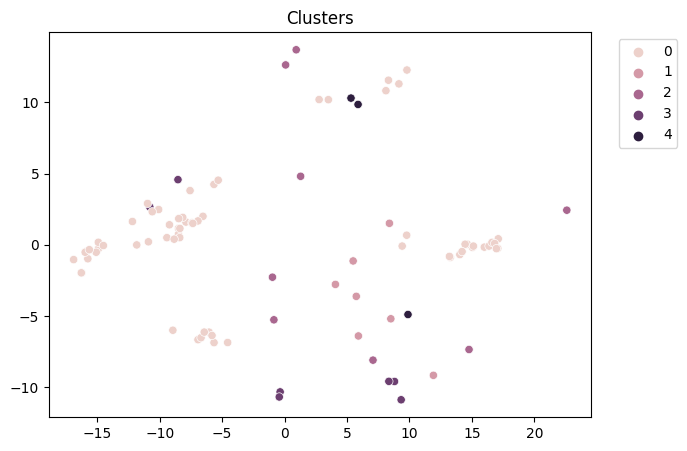

In [ ]:
from sklearn.cluster import SpectralClustering

spect = SpectralClustering(n_clusters=5,random_state=33, assign_labels='discretize')
spect.fit_predict(scaled)
clusters=spect.labels_

plt.figure(figsize=(7,5));
sns.scatterplot(x=decomp[:,0], y=decomp[:,1], hue =clusters);
plt.title('Clusters');
plt.legend(loc=(1.05,0.7));

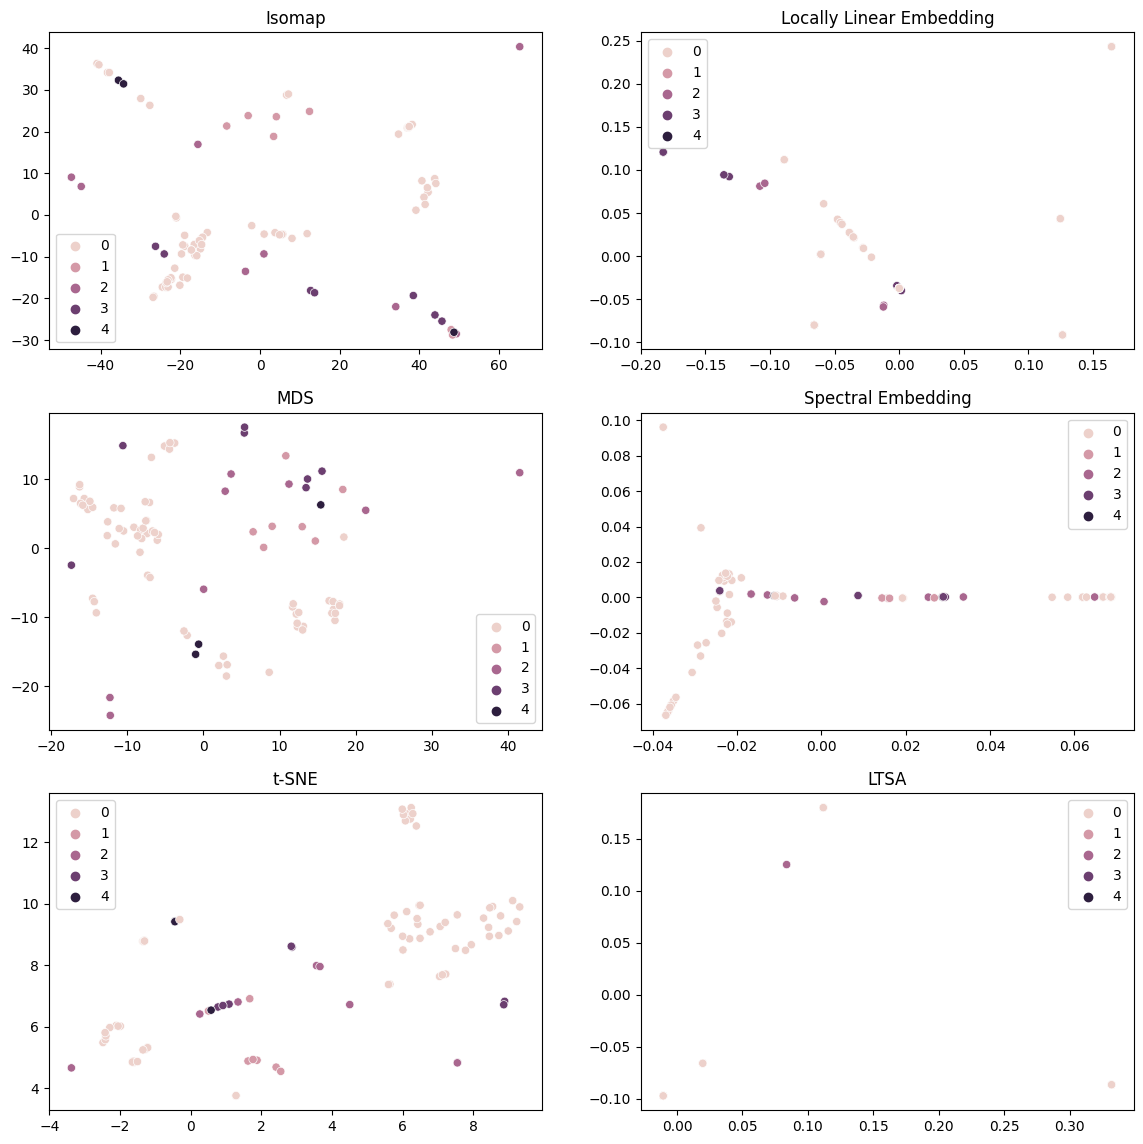

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=clusters);
plt.legend(loc='best');
plt.title('LTSA');


# **Self-Organising Maps**

In [ ]:
!pip install biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.5 MB/s eta 0:00:00


<Axes: >

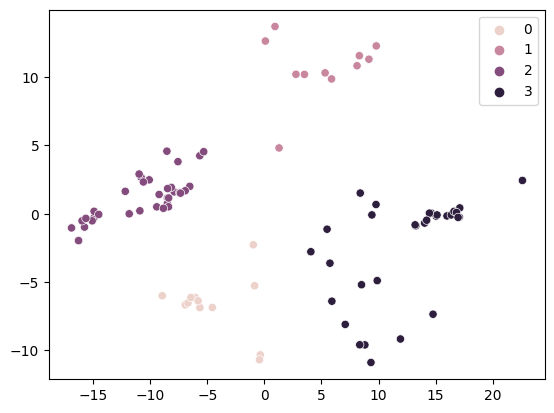

In [ ]:
from Bio.Cluster import somcluster

#run algorithm
som_id, som_data = somcluster(decomp, nxgrid=2, nygrid=2, niter=10000,inittau=0.8)

#calculate labels and plot the results
som_labels = []
for t in som_id:
    if (t[0] == 0) & (t[1] == 0): som_labels.append(0)
    elif (t[0] == 0) & (t[1] == 1): som_labels.append(1)
    elif (t[0] == 1) & (t[1] == 0): som_labels.append(2)
    else: som_labels.append(3)

sns.scatterplot(x=decomp[:,0],y=decomp[:,1],hue=som_labels)

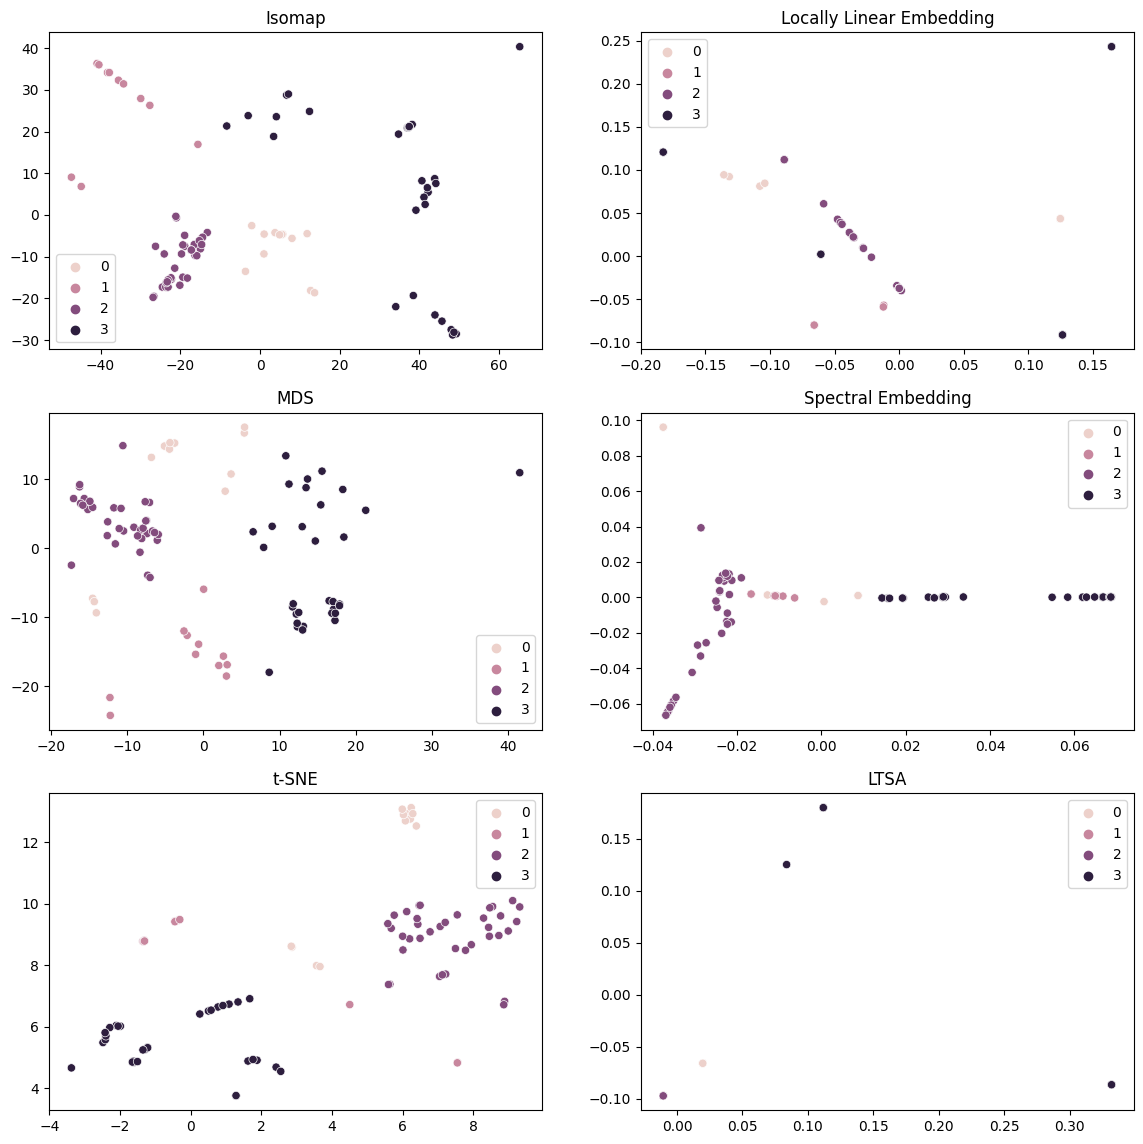

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(3,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(3,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(3,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('Spectral Embedding');

plt.subplot(3,2,5)
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('t-SNE');

plt.subplot(3,2,6)
sns.scatterplot(x=ltsa[:,0],y=ltsa[:,1], hue=som_labels);
plt.legend(loc='best');
plt.title('LTSA');

sample assigned to grid-point:  [1 1]


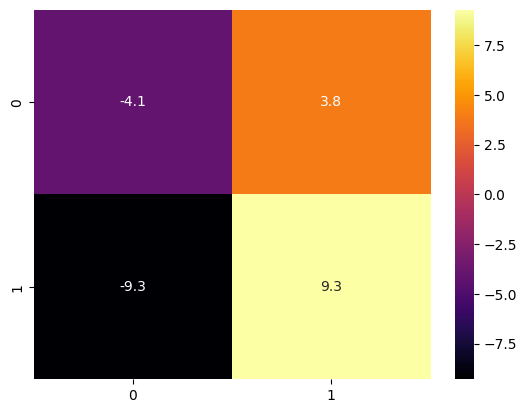

In [ ]:
print('sample assigned to grid-point: ',som_id[0])
sns.heatmap(som_data[:,:,0],cmap='inferno',annot=True);